<a href="https://colab.research.google.com/github/EShepotinnik/meth_viz/blob/main/hw1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### Шепотинник Егор
Группа М05-12б


---


# Задание №1

In [ ]:
import networkx as nx
import matplotlib.pyplot as plt


In [ ]:
from networkx.drawing.nx_pydot import graphviz_layout

In [ ]:
g=nx.read_graphml('/content/sample_data/tree-72n.xml')

Нарисуем как граф выглядит без укладки

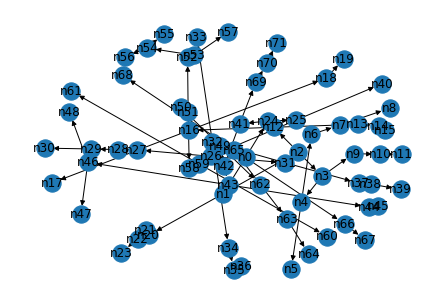

In [ ]:
nx.draw(g, with_labels=True)

Заведем словарь для вершин и ребер

In [ ]:
dict_nods ={}
for i in g.nodes:
  dict_nods[i]= list(g.neighbors(i))

Задаем функцию укладки hv подходом

In [ ]:
def hv_tree_def(root, x, y):

  child = dict_nods[root]
  pos[root] = (x,y)

  if len(child) == 0:
    return 0
  
  else:
    if len(child) == 1:
      return hv_tree_def(child[0],x + 1, y)
    else:
      y_right = hv_tree_def(child[0], x + 1, y)
      y_left = hv_tree_def(child[1], x, y + y_right - 1)
      return y_right + y_left -1

Получаем такую картину

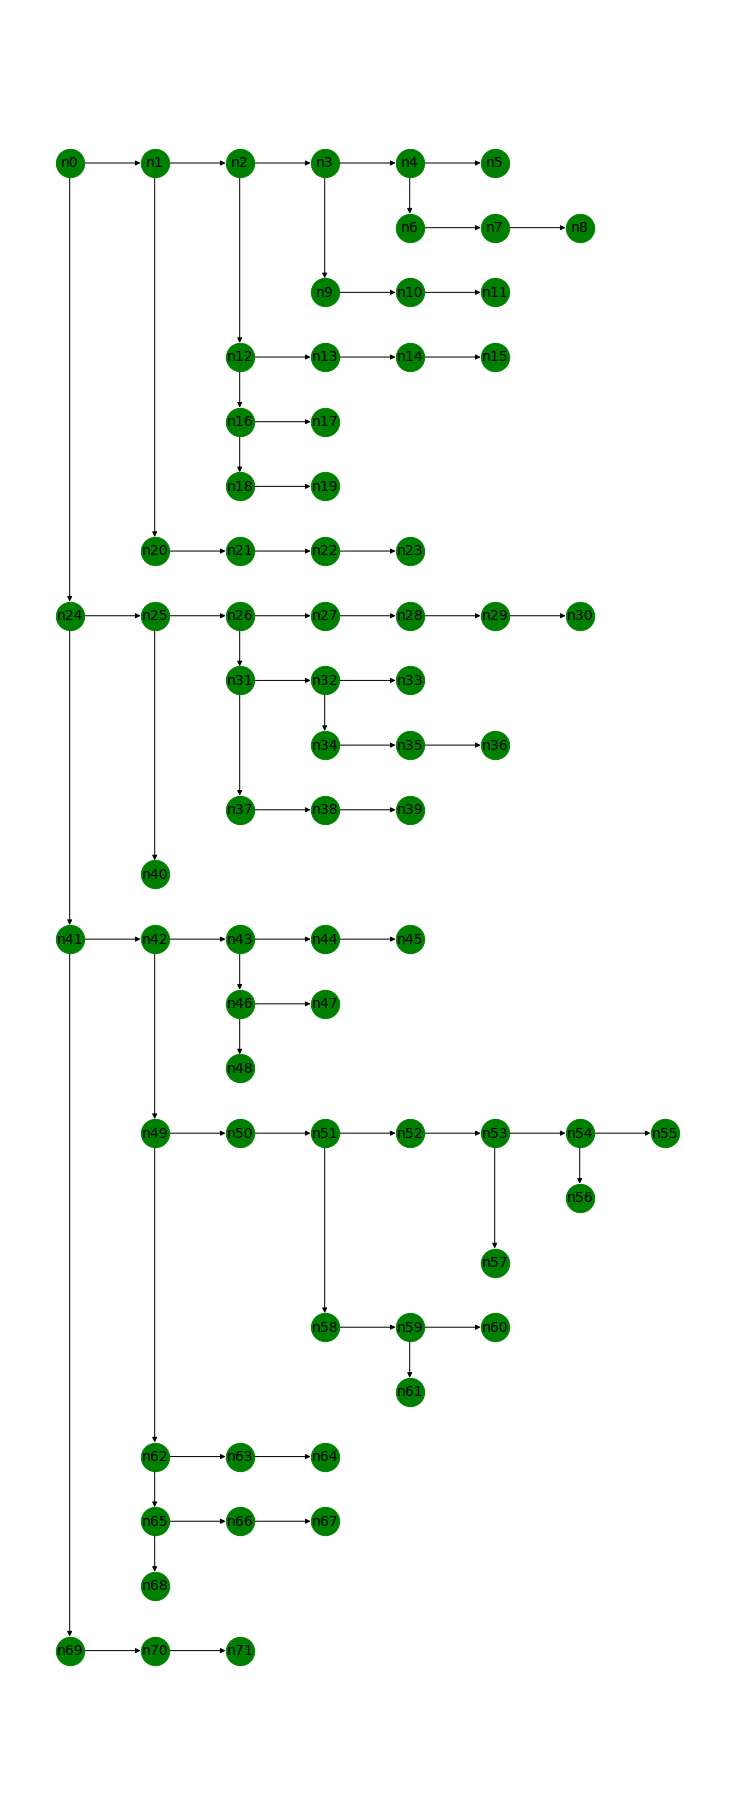

In [ ]:
pos = {}
hv_tree_def(list(dict_nods.keys())[0], 0, 0)
plt.figure(figsize=(10,25))
nx.draw(g,pos, with_labels=True, node_size=800 , node_color='g', font_size=14)
plt.savefig('hv.svg')

Добавим отрисовку с поворотом на 45 градусов

In [ ]:
def hv_tree_45(root, x, y):

  child = dict_nods[root]
  pos45[root] = (x,y)

  if len(child) == 0:
    return 0
  
  else:
    if len(child) == 1:
      return hv_tree_45(child[0],x + 0.5, y - 0.5)
    else:
      y_right = hv_tree_45(child[0], x + 0.5, y - 0.5)
      y_left = hv_tree_45(child[1], x- 0.5 + y_right, y + y_right - 0.5)
      return y_right + y_left - 0.5

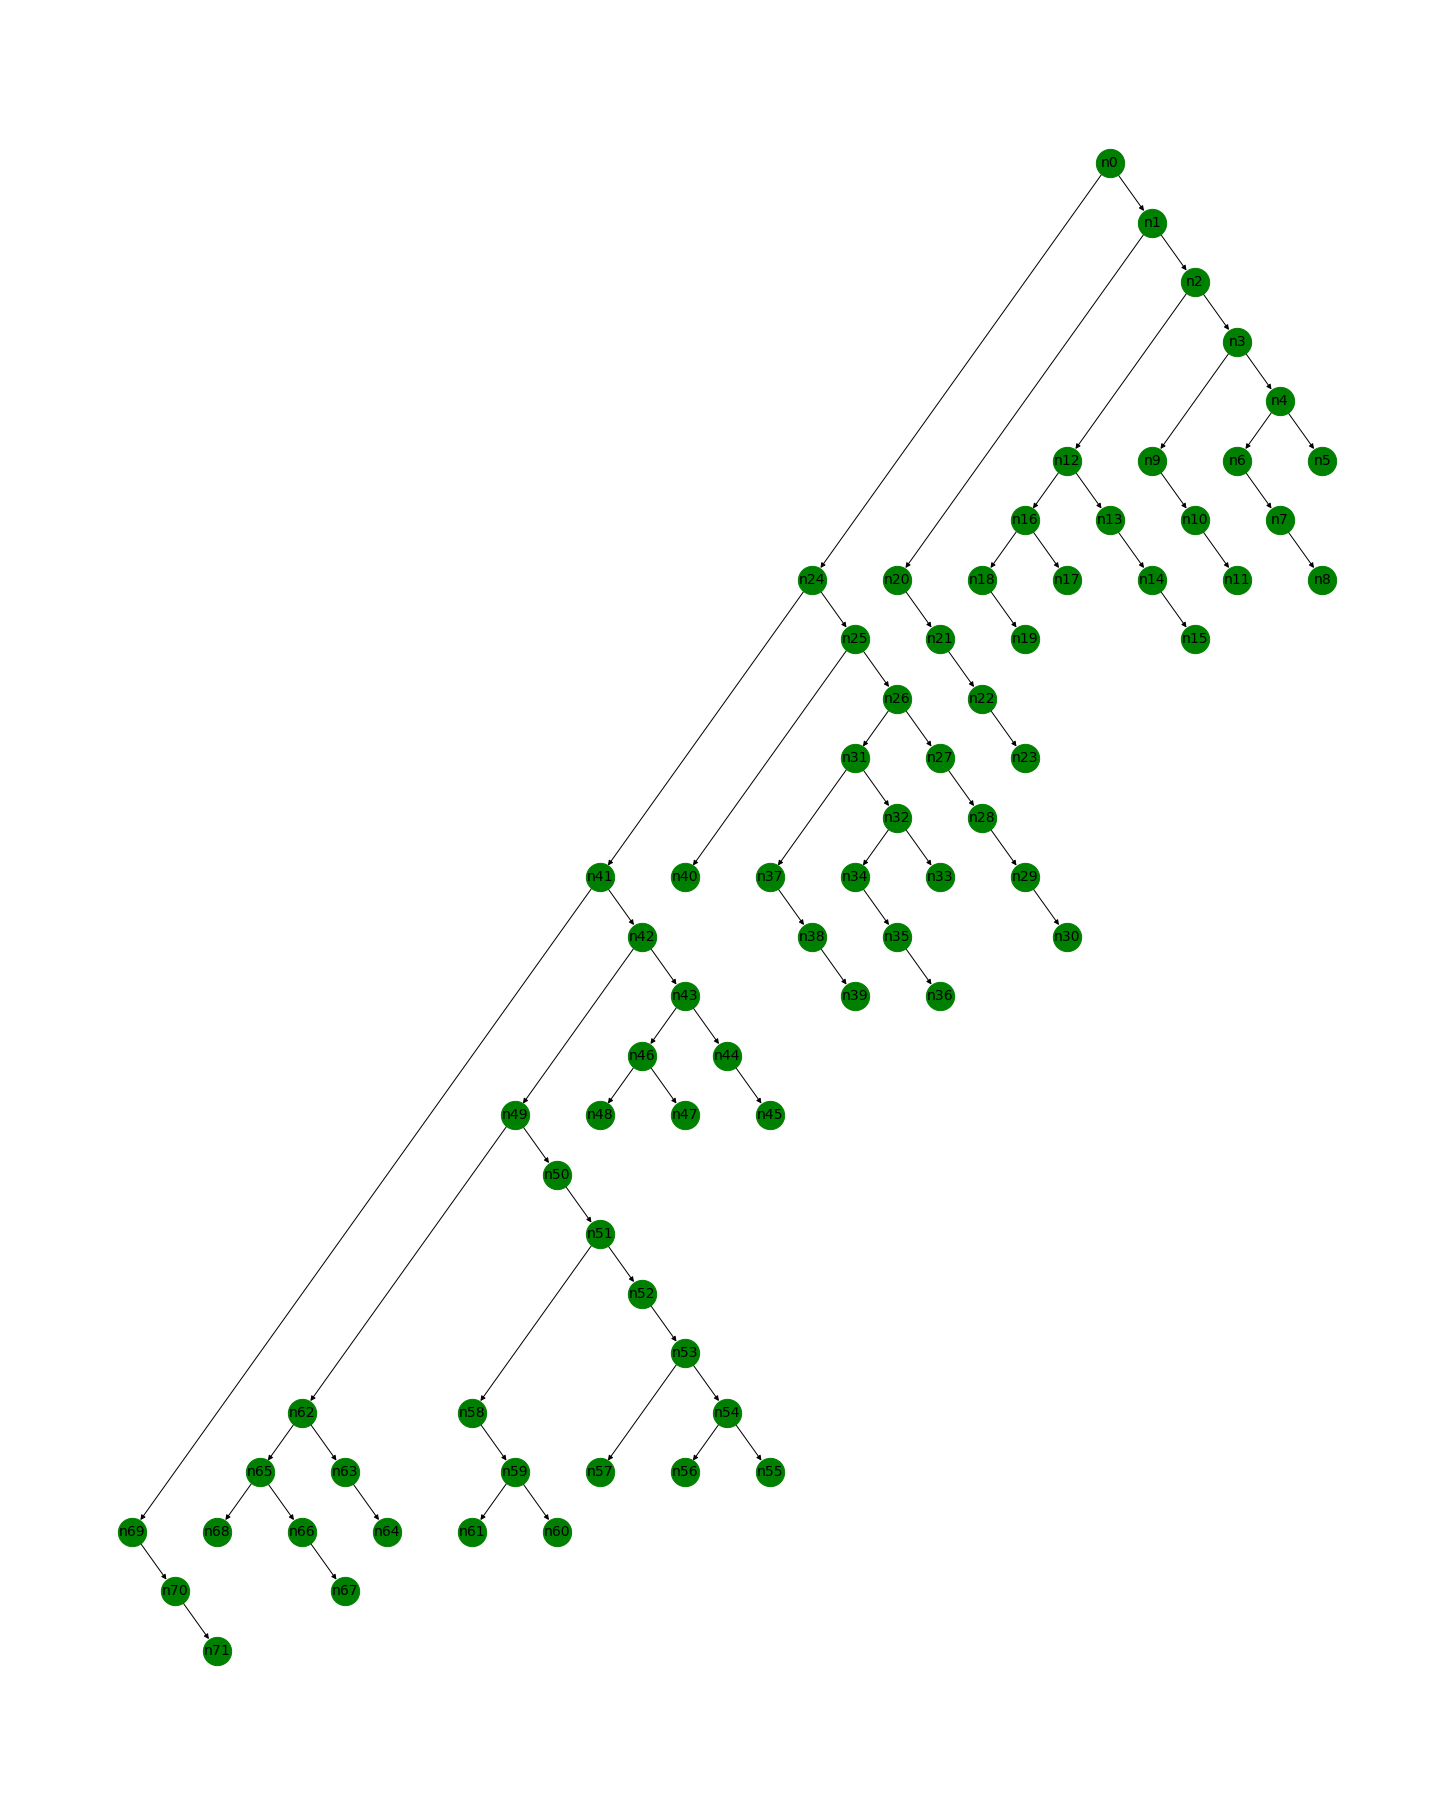

In [ ]:
pos45 = {}
hv_tree_45(list(dict_nods.keys())[0], 0, 0)
plt.figure(figsize=(20,25))
nx.draw(g,pos45, with_labels=True, node_size=800 , node_color='g', font_size=14)
plt.savefig('hv_45.svg')